In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# %matplotlib notebook
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regressão linear

Temos o seguinte problema: queremos prever o valores de uma casa a partir de uma série de atributos. Esse é um problema de regressão e não classificação. A base a ser usada é do sklearn e a descrição dos seus atributos se encontra em: [Base de preço da casa](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

Para fins didáticos, escolhemos um único atributo, ou seja, queremos prever o valor da casa em função de um único atributo. Isso porque queremos mostrar o gráfico, ou seja, apenas para fins didáticos. No entanto, adaptar o código para mais de um atributo é extremamente simples.

In [ ]:
housevalue_df = datasets.fetch_california_housing(as_frame=True).frame

In [ ]:
housevalue_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


O campo escolhido para fazer a regressão foi o de renda média das pessoas. Novamente, isso é apenas para fins didáticos, o ideal seria considerar quantos campos possível.

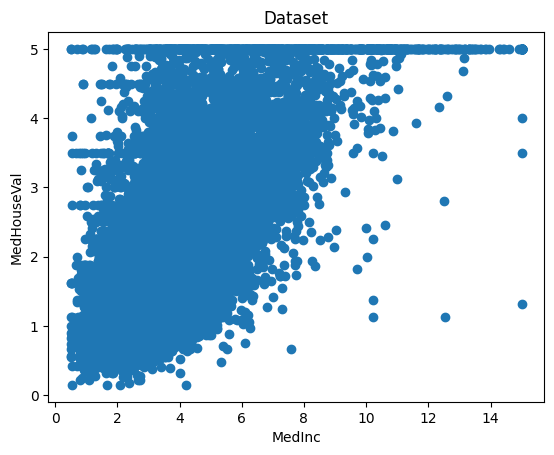

In [ ]:
x = housevalue_df['MedInc'].values
y = housevalue_df['MedHouseVal'].values

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal') # em unidade de 100.000
plt.title('Dataset')
plt.show()

Observe no gráfico acima que existe um acumulo em "5". Isso deve criar distorções na regressão. O ideal seria tratá-los. Mas vamos ignorar isso.

A seguir, vamos fazer a regressão linear na mão. Lembrando que se colocamos o bias (viés / interceptador / b) dentro do vetor **w**, devemos incluir uma coluna com números "1" nos dados de entrada. O código abaixo faz exatamente isso.

In [ ]:
X = np.c_[np.ones((x.shape[0],1)), x]
X

array([[1.    , 8.3252],
       [1.    , 8.3014],
       [1.    , 7.2574],
       ...,
       [1.    , 1.7   ],
       [1.    , 1.8672],
       [1.    , 2.3886]])

A seguir faremos o cálculo da regressão linear para encontrar o vetor de pesos **w**. Observe que **w** tem duas dimensoes, um peso para a variável renda e outro peso para o bias (b). Lembrando a fórmula:

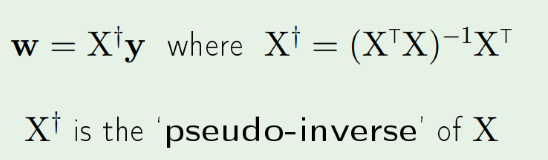

In [ ]:
pseudo_inversa = np.linalg.pinv( X )
w = np.dot( pseudo_inversa, y )
w

array([0.45085577, 0.41793849])

Vamos verificar como ficou a aproximação

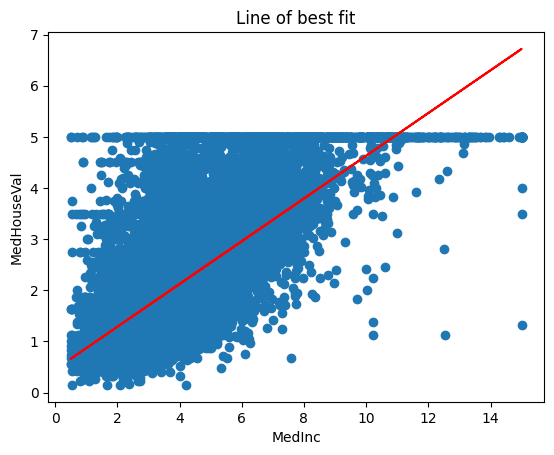

In [ ]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = w[1] * x + w[0]
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('Line of best fit')
plt.show()

Observe que os outliers pressionaram a inclinação da curva. Abaixo faremos a mesma regressão usanddo a biblioteca python. Devemos encontrar os mesmos valores de **w**.

In [ ]:
reg = LinearRegression().fit(np.reshape(x, (len(x),1)), y)

In [ ]:
reg.intercept_

0.45085576703267893

In [ ]:
reg.coef_

array([0.41793849])

# Perceptron

A seguir usaremos o dataset iris para demonstrar o modelo linear perceptron. O perceptron é binário. Iremos classificar se uma flor é do tipo setosa ou não. Observe que não dividimos os dados em treinamento e teste para fins didáticos. Na prática, essa divisão deve ser feita.

In [ ]:
dataset_iris = datasets.load_iris(as_frame=True)
iris_target_name = dataset_iris.target_names
iris_target_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_df = dataset_iris.frame

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Para aplicar o algoritmo da forma que está implementado, os rótulos deverão ser +1 (caso seja setosa) ou -1 (do contrário).

In [ ]:
iris_df['target'] = iris_df.target.apply( lambda x: 1 if x==0 else -1 )

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1


Para fins didáticos, usaremos apenas 2 atributos o que é suficiente no nosso caso. Escolhemos deixar sepal lenght e petal lenght.

In [ ]:
iris_df.drop(['sepal width (cm)', 'petal width (cm)'], axis=1, inplace=True)

Vamos verificar como fica a classificação em função desses atributos.

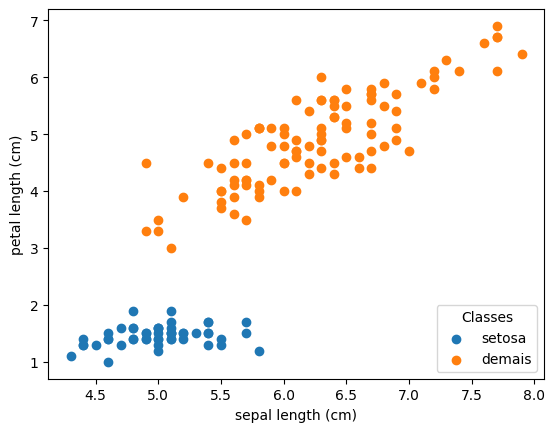

In [ ]:

_, ax = plt.subplots()
df_positivo = iris_df[iris_df['target']==1]
scatter = ax.scatter(df_positivo['sepal length (cm)'], df_positivo['petal length (cm)'])
df_negativo = iris_df[iris_df['target']==-1]
scatter = ax.scatter(df_negativo['sepal length (cm)'], df_negativo['petal length (cm)'])
ax.set(xlabel='sepal length (cm)', ylabel='petal length (cm)')
_ = ax.legend(
    ['setosa', 'demais'], loc="lower right", title="Classes"
)


Observe que só conseguiremos aplicar o Perceptron porque os dados são linearmente separáveis. Caso não fossem, o algoritmo tende a executar infinitamente. Um algoritmo alternativo para esses casos é o Pocket Perceptron. Ele guarda a reta com o menor erro durante o treinamento, sendo essa a escolha final.

A seguir criamos uma função para plotar a reta durante o treinamento, bem como o sentido do vetor **w**

In [ ]:
# from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, print_values=False):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])



    # reta que separa os dados: w0 + w1 * x1 + w2 * x2 = 0

    # vamos fixar x1 em 4 e 9
    plt.xlim(-2,9)
    plt.ylim(-2,9)
    x1 = [-2,9]
    x2 = [-(classifier.w_[0] + x1[0] * classifier.w_[1])/classifier.w_[2],
          -(classifier.w_[0] + x1[1] * classifier.w_[1])/classifier.w_[2]]
    if print_values:
      print( 'w:', classifier.w_ )
      print( 'Decision boundary:', x1, x2 )
    plt.plot( x1, x2 )

    # plota o w
    plt.arrow(0,0,
    classifier.w_[1], classifier.w_[2],  head_width=0.2, head_length=0.1, fc='red', ec='red', label='Vetor de Pesos')

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, color=cmap(i), marker=markers[i], label=cl)

Abaixo uma classe que implementa o perceptron seguida pela sua execução.

In [ ]:
# Take an objected-oriented approach to define the perceptron interface as a Python Class
# It has a fit method a predict method
# Add an underscore to attributes that are not being created upon the initialization of the object but by calling the object's other methods
# In practice, samples need to be shuffled at each epoch
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y, debug=False):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        # initialize weights as zeros of size 1 + number of features, errors as empty list
        # O número 1 é o "b" (bias/ viés/ intereceptador)
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            # iterate samples one by one and update the weights
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) # observe que se o exemplo estiver corretamente classificado, isso retornará 0
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
                if update != 0.0:
                  if debug:
                    plot_decision_regions(X, y, self, print_values=debug)

                    plt.show()

            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input before activation"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
X = iris_df.drop('target', axis=1).values
y = iris_df['target'].values

w: [-0.2  -1.4  -0.94]
Decision boundary: [-2, 9] [2.7659574468085104, -13.617021276595745]


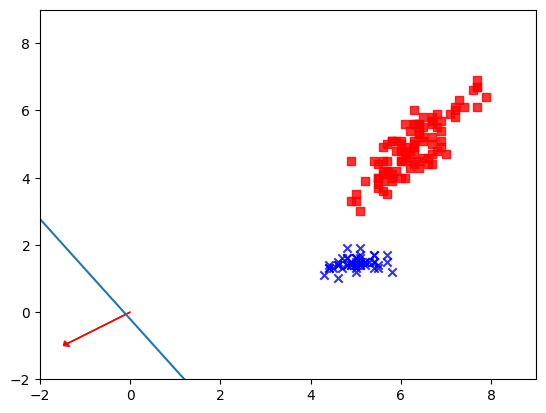

w: [ 0.   -0.38 -0.66]
Decision boundary: [-2, 9] [1.1515151515151516, -5.181818181818182]


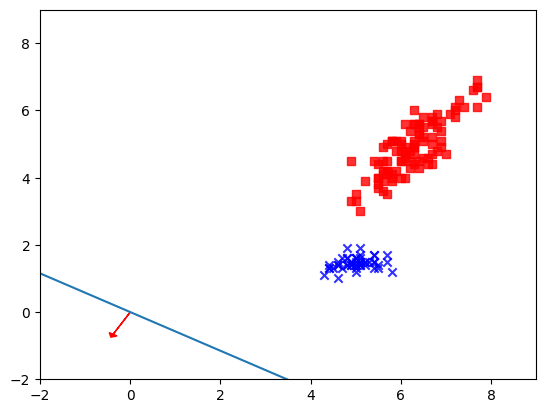

w: [ 0.2   0.6  -0.38]
Decision boundary: [-2, 9] [-2.63157894736842, 14.73684210526315]


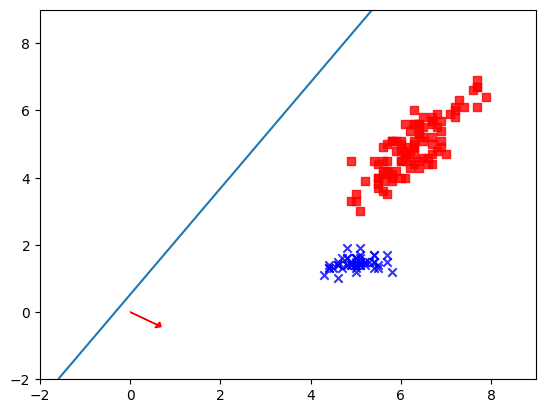

w: [ 0.   -0.8  -1.32]
Decision boundary: [-2, 9] [1.2121212121212122, -5.454545454545454]


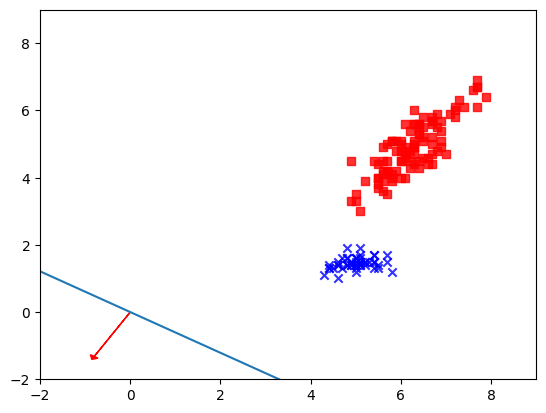

w: [ 0.2   0.22 -1.04]
Decision boundary: [-2, 9] [-0.23076923076923045, 2.0961538461538445]


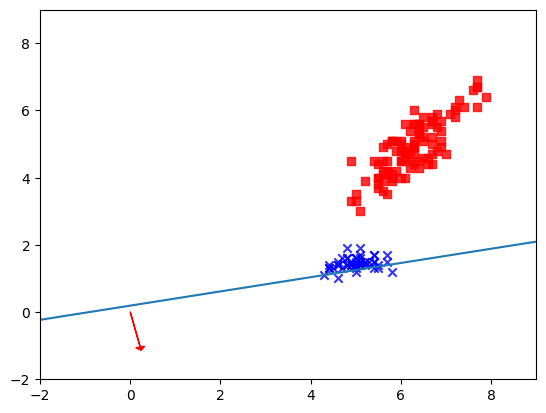

w: [ 0.4   1.2  -0.76]
Decision boundary: [-2, 9] [-2.6315789473684204, 14.736842105263152]


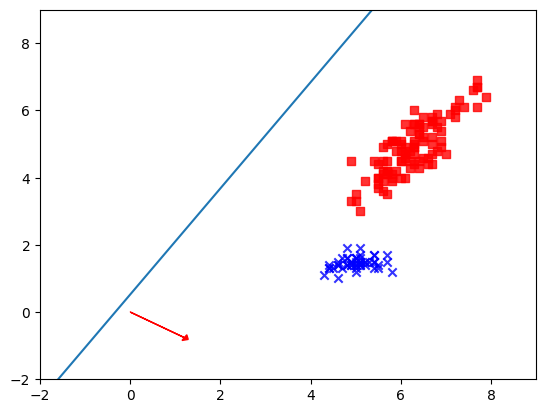

w: [ 0.2 -0.2 -1.7]
Decision boundary: [-2, 9] [0.35294117647058837, -0.9411764705882362]


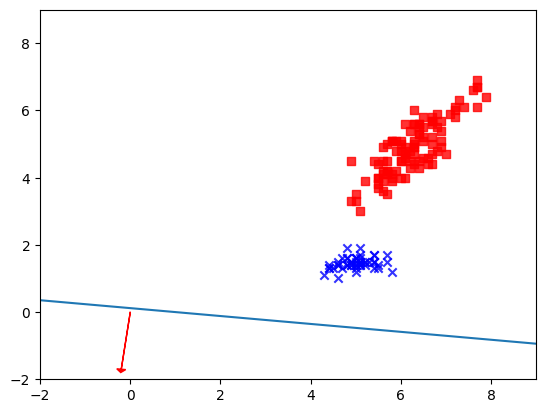

w: [ 0.4   0.82 -1.42]
Decision boundary: [-2, 9] [-0.873239436619718, 5.478873239436619]


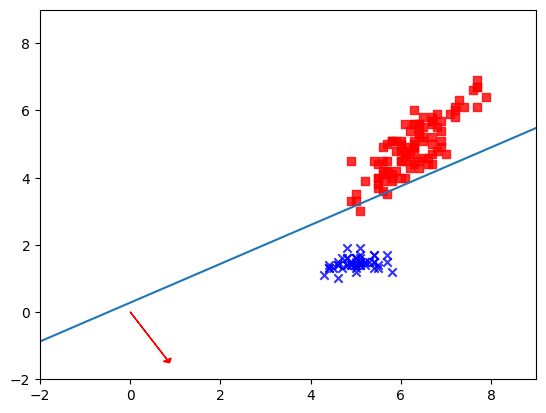

w: [ 0.2  -0.32 -2.12]
Decision boundary: [-2, 9] [0.39622641509433987, -1.2641509433962275]


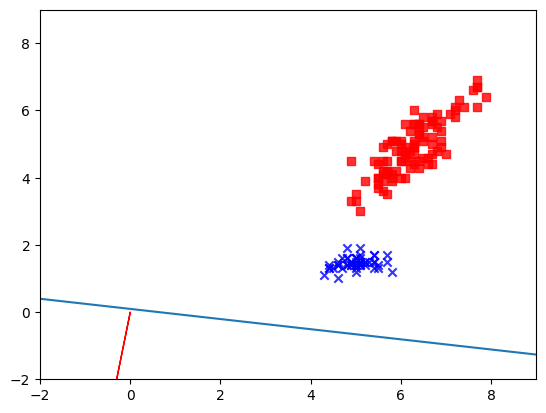

w: [ 0.4   0.7  -1.84]
Decision boundary: [-2, 9] [-0.5434782608695649, 3.6413043478260856]


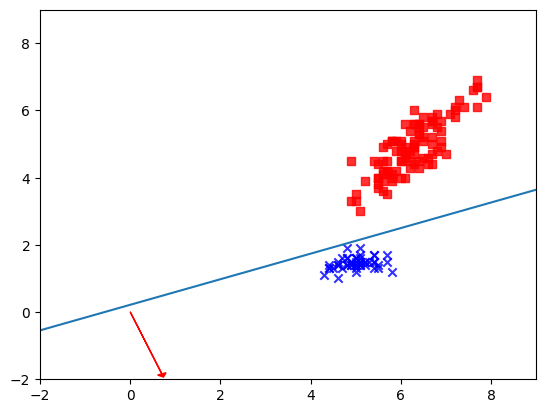

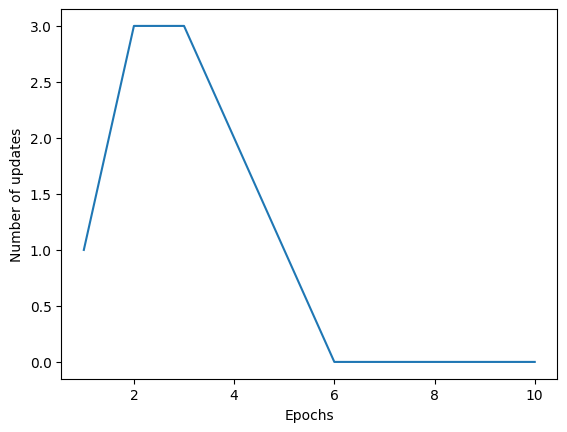

In [ ]:
# Create a perceptron classifer object and train the classifier with iris data
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y, debug=True)

# plot the error for each epoch to check for convergence
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Abaixo os pesos encontrados para **w**. Temos o "b" (bias) e mais o valor dos pesos para os dois atributos escolhidos (sepal lenght e petal length).

In [ ]:
print( ppn.w_ )

[ 0.4   0.7  -1.84]


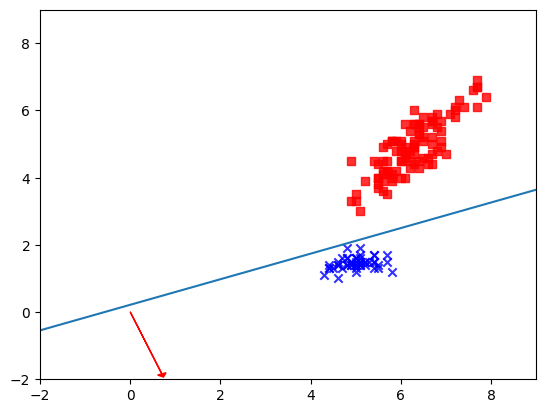

In [ ]:
plot_decision_regions(X, y, ppn)


A seta representa **w** que aponta no sentido dos positivos.

#Rede neural - XOR

Vamos construir uma rede neural que aprenda o "XOR¨. Nesse exemplo, usaremos "0" como falso e "1" como verdadeiro.

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |


Diferente dos demais exemplos, a biblioteca mais usada para redes neurais é o pytorch. Vamos usá-la para criar nossa rede neural. Uma primeira observação é que usaremos a função sigmóide ao invés da função signal. A função sigmóide é suave, o que facilita o aprendizado, evitando ficar preso em um mínimo local. Lembrando a função sigmóide:

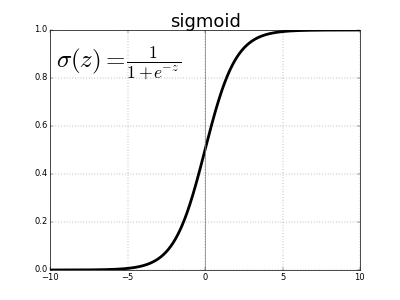

In [ ]:
class XOR(nn.Module):
    """
    An XOR is similuated using neural network with
    two fully connected linear layers
    """

    def __init__(self, input_dim, output_dim):
        """
        Args:
            input_dim (int): size of the input features
            output_dim (int): size of the output
        """
        super(XOR, self).__init__()
        self.fc1 = nn.Linear(input_dim, 2) # a camada interna possui 2 neurônios
        self.fc2 = nn.Linear(2, output_dim) # a camada de saída, 1 neurônio, que deverá ser um valor entre 0 e 1

    def forward(self, x_in):
        """The forward pass of the perceptron

        Args:
            x_in (torch.Tensor): an input data tensor
                x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be (batch,).
        """
        hidden = torch.sigmoid(self.fc1(x_in))
        yhat = torch.sigmoid(self.fc2(hidden))
        return yhat

In [ ]:
model = XOR(2,1)

In [ ]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0756, -0.1249],
                      [-0.2107,  0.4520]])),
             ('fc1.bias', tensor([ 0.6077, -0.0700])),
             ('fc2.weight', tensor([[-0.1583,  0.0103]])),
             ('fc2.bias', tensor([-0.0422]))])

O pytorch permite que se execute o modelo em uma GPU, que executa muito mais rápido do que a CPU para esse tipo de problema.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

O nosso conjunto de treinamento e validação é o mesmo. Lembrando que esse é apenas um exemplo didático. Na prática, desconhecemos a nossa função real.

In [ ]:
# Training data preparation

x_train_tensor = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], device=device).float()
y_train_tensor = torch.tensor([0.,1.,1.,0.], device=device).view(4,1).float()

x_val_tensor = torch.clone(x_train_tensor)
y_val_tensor = torch.clone(y_train_tensor)

In [ ]:
# Verify the shape of the output tensor
y_train_tensor.shape

torch.Size([4, 1])

Precisamos escolher a função de erro. No nosso caso, escolhemos a [função de entropia cruzada](https://en.wikipedia.org/wiki/Cross-entropy) para dados binário (BCELoss). A função de entropia cruzada visa maximizar a verossimilhança dos dados (maximum likelihood).
Abaixo executamos o algoritmo.

In [ ]:
# Sets learning rate - this is "eta" ~ the "n" like
# Greek letter
lr = 0.01

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = XOR(2,1)
model = model.to(device)

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a BCE loss function (Obs.: MSELoss também deve funcionar)
loss_fn = nn.BCELoss()# reduction='mean')

# Defines number of epochs
n_epochs = 250000

log_interval = 500
train_losses = np.zeros((n_epochs - 1) // log_interval + 1)
test_losses  = np.zeros((n_epochs - 1) // log_interval + 1)


In [ ]:
for epoch in range(n_epochs):
    #for j in range(steps):
    model.train() # Isso avisa que o modelo precisa guardar os valores calculados pela camada intermediária para poder calcular a derivada depois.

    # Step 1 - Computes model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)

    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)


    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()
    if (epoch % log_interval == 0):
        print("Epoch: {0}, Loss: {1}, ".format(epoch, loss.to("cpu").detach().numpy()))
        train_losses[epoch//log_interval] = loss.item()
        test_losses[epoch//log_interval] = loss.item()

# We can also inspect its parameters using its state_dict
print(model.state_dict())

Epoch: 0, Loss: 0.7482295036315918, 
Epoch: 500, Loss: 0.6953791379928589, 
Epoch: 1000, Loss: 0.6945038437843323, 
Epoch: 1500, Loss: 0.6943532228469849, 
Epoch: 2000, Loss: 0.6942301392555237, 
Epoch: 2500, Loss: 0.6941229104995728, 
Epoch: 3000, Loss: 0.6940289735794067, 
Epoch: 3500, Loss: 0.6939462423324585, 
Epoch: 4000, Loss: 0.6938732862472534, 
Epoch: 4500, Loss: 0.6938086748123169, 
Epoch: 5000, Loss: 0.6937512755393982, 
Epoch: 5500, Loss: 0.6937000155448914, 
Epoch: 6000, Loss: 0.6936541795730591, 
Epoch: 6500, Loss: 0.6936129927635193, 
Epoch: 7000, Loss: 0.6935760974884033, 
Epoch: 7500, Loss: 0.6935427188873291, 
Epoch: 8000, Loss: 0.6935124397277832, 
Epoch: 8500, Loss: 0.6934850215911865, 
Epoch: 9000, Loss: 0.6934601068496704, 
Epoch: 9500, Loss: 0.6934373378753662, 
Epoch: 10000, Loss: 0.6934164762496948, 
Epoch: 10500, Loss: 0.6933974623680115, 
Epoch: 11000, Loss: 0.6933798789978027, 
Epoch: 11500, Loss: 0.6933639645576477, 
Epoch: 12000, Loss: 0.6933490037918091, 

In [ ]:
model.eval() # isso avisa o modelo que ele não precisa mais guardar valores das camadas intermediárias.

XOR(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

Abaixo, vamos verificar como ficou o erro durante o treinamento a cada 500 épocas.

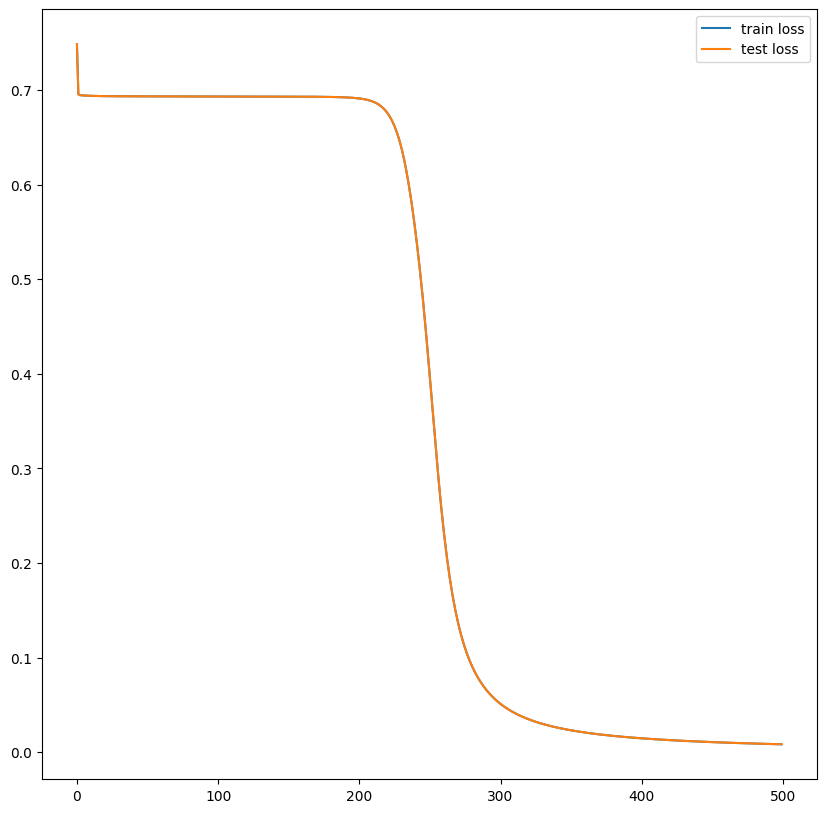

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

Observe um comportamento interessante. A função perda demorou a cair. Isso acontece porque durante o treinamento, a função pode ter encontrado um plateau, ou seja, a derivada é quase 0, mas não é 0. Nessas situações, é preciso persistir no treinamento até vencer o plateau para que o erro continue a minimizar. Abaixo vamos verificar como nossa rede se comporta.

In [ ]:
model(torch.tensor([0.,1.]).to(device))

tensor([0.9924], grad_fn=<SigmoidBackward0>)

In [ ]:
model(torch.tensor([0.,0.]).to(device))

tensor([0.0103], grad_fn=<SigmoidBackward0>)

In [ ]:
model(torch.tensor([1.,1.]).to(device))

tensor([0.0080], grad_fn=<SigmoidBackward0>)

In [ ]:
model(torch.tensor([1.,0.]).to(device))

tensor([0.9924], grad_fn=<SigmoidBackward0>)

In [ ]:
model(torch.tensor([1.,0.]).to(device)).detach().numpy()[0] > 0.5

True

In [ ]:
# %tensorboard --logdir runs

# Rede neural - Iris

O próximo exemplo vamos tentar classificar os tipos de flores do dataset iris usanddo uma rede neural. Esse é um problema de classificação multiclasse.
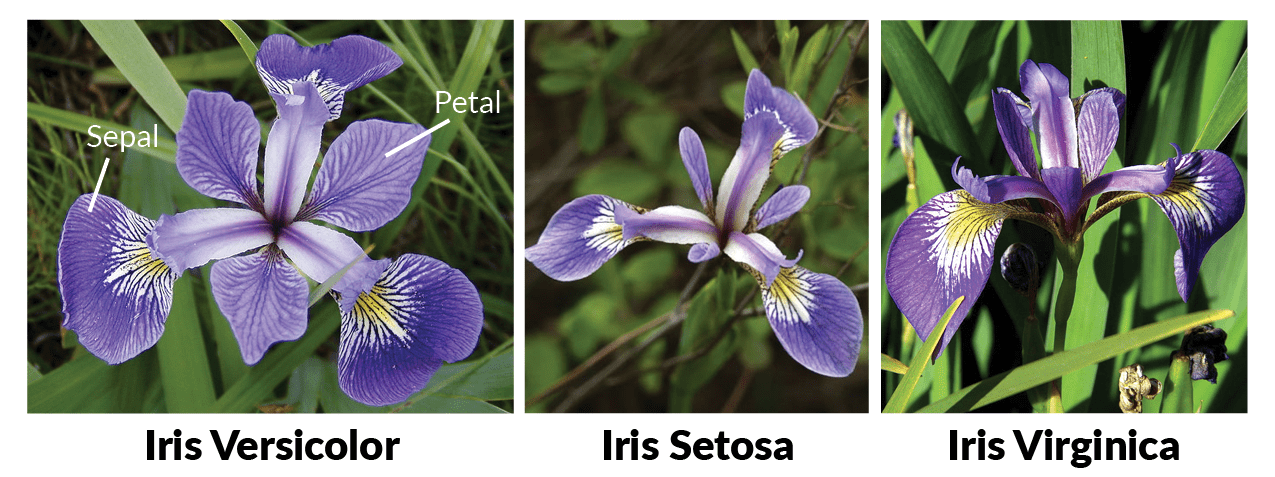

In [ ]:
dataset_iris = datasets.load_iris(as_frame=True)
iris_target_name = dataset_iris.target_names
iris_target_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris_df = dataset_iris.frame

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X = iris_df.drop(["target"],axis=1).values
y = iris_df["target"].values

Vamos fazer o correto e quebrar os dados em treinamento e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

A primeira observação é que devemos normalizar nossos dados. Isso porque se os atributos estiverem em uma escala muito diferente, o treinamento poderá levar muito mais tempo. Vamos normalizar os dados em uma N(0,1). Aqui temos de tomar cuidado! Os dados serão normalizados no treinamento e os parâmetros encontrados no treinamento serão usados para normalizar os dados no teste! Isso significa que o valor da média e desvio padrão encontrados no treinamento deverão ser aplicados nos dados de validação. Isso evita contaminação dos dados.



In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Vamos converter os dados para matrizes e vetores do pytorch.

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

A seguir criamos a nossa rede neural. Observe que dessa vez criamos uma rede com duas camadas internas, com 5 e 3 neurônios, respectivamente. A função de ativação escolhida nas camadas internas foi a RELU, muito usada em redes neurais pela sua simplicidade (x = max(x,0) ). A rede neural terá 3 neurônios na saída, sendo que a classe será daquele neurônio com maior valor.

In [ ]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim, neuronios_camada_1 = 5, neuronios_camada_2 = 3):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,neuronios_camada_1)
        self.hidden_layer1  = nn.Linear(neuronios_camada_1,neuronios_camada_2)
        self.output_layer   = nn.Linear(neuronios_camada_2,output_dim)
        self.relu = nn.ReLU()


    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [ ]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica
input_dim  = 4
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)

A função erro escolhida foi a entropia cruzada multiclasse (Cross Entropy Loss). Essa função de erro pega os valores dos neurônios de saída, transforma em probabilidade e tenta aproximar do valor da classe real. Por exemplo, suponha que a saída dos 3 neurônios da rede neural sejam:

[ 0.0394,  1.7093, -0.2127]

Vamos supor também que a classe correta seja a primeira:

[ 1     ,       0,       0]

Essa função de erro transforma a saída dos 3 neurônios em uma probabilidade proporcional:

[0.1411, 0.7493, 0.1096]

E tenta aproximar o valor 0,1411 em 1, quanto mais distante, maior o erro. Pra isso, calcula o - log 0,1411 como sendo o erro, ou seja, -log da probabilidade da classe que devia ter sido prevista com probabilidade 1 ( ou seja, erro 0).

A seguir, vamos executar o treinamento.

In [ ]:
# creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)



        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()


        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [ ]:
num_epochs = 5000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [ ]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/5000, Train Loss: 0.3691, Test Loss: 0.3070
Epoch 100/5000, Train Loss: 0.1150, Test Loss: 0.0798
Epoch 150/5000, Train Loss: 0.0628, Test Loss: 0.0241
Epoch 200/5000, Train Loss: 0.0554, Test Loss: 0.0156
Epoch 250/5000, Train Loss: 0.0541, Test Loss: 0.0131
Epoch 300/5000, Train Loss: 0.0537, Test Loss: 0.0119
Epoch 350/5000, Train Loss: 0.0535, Test Loss: 0.0112
Epoch 400/5000, Train Loss: 0.0534, Test Loss: 0.0109
Epoch 450/5000, Train Loss: 0.0534, Test Loss: 0.0107
Epoch 500/5000, Train Loss: 0.0533, Test Loss: 0.0106
Epoch 550/5000, Train Loss: 0.0533, Test Loss: 0.0105
Epoch 600/5000, Train Loss: 0.0533, Test Loss: 0.0105
Epoch 650/5000, Train Loss: 0.0533, Test Loss: 0.0105
Epoch 700/5000, Train Loss: 0.0533, Test Loss: 0.0105
Epoch 750/5000, Train Loss: 0.0532, Test Loss: 0.0105
Epoch 800/5000, Train Loss: 0.0532, Test Loss: 0.0105
Epoch 850/5000, Train Loss: 0.0532, Test Loss: 0.0105
Epoch 900/5000, Train Loss: 0.0532, Test Loss: 0.0104
Epoch 950/5000, Train Loss: 0

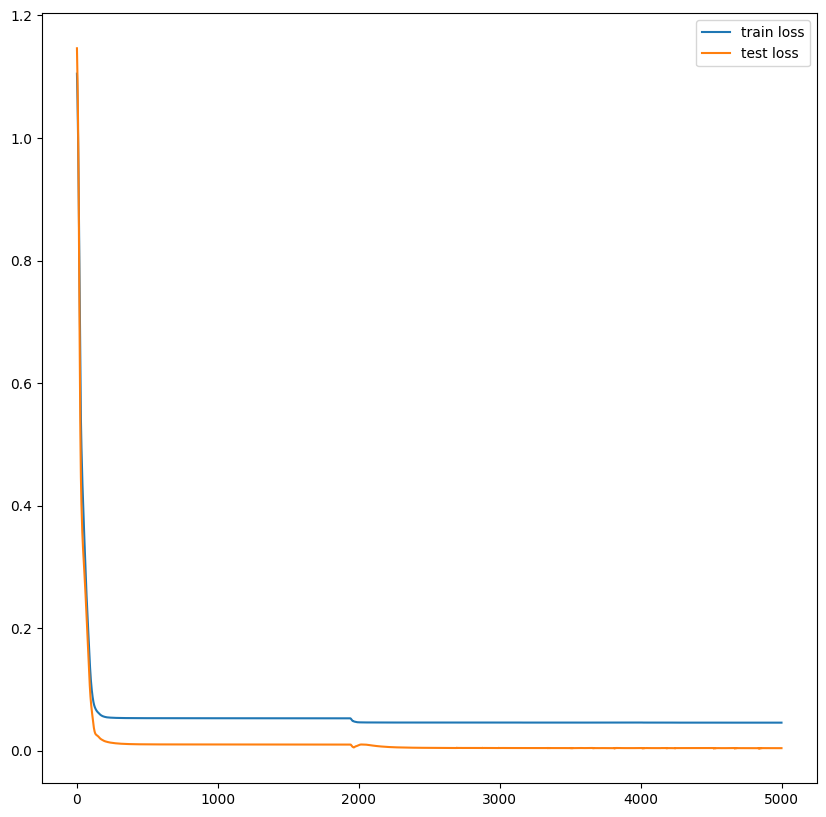

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

Vamos medir a acurácia no treinamento e no teste. Você lembra das outras métricas?

In [ ]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [ ]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [ ]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [ ]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 98.095
Test Accuracy: 100.0


# Exercícios

Aplique **regressão linear** aos seus dados. Se os seus dados forem de classificação, como exercício, você pode considerar que cada classe é um valor contínuo.

Crie uma **rede neural** para os seus dados do trabalho. Tome alguns cuidados importantes:

* Lembre-se de normalizar os dados antes de treinar.
* Altere o número de neurônios e camadas e verifique como o modelo se comporta. Houve underfitting ou overfitting?
* Dados categóricos precisam ser transformados em numéricos. Uma forma é fazer com que cada categoria vire uma coluna nos seus dados. Veja: dummy no notebook de árvore de decisão.
* Lembre-se que o erro durante o treinamento pode atingir um plateau e demorar um pouco para continuar a cair.
* Como ficam as demais métricas aplicadas a seus dados? Como posso usar as bilbiotecas do sklearn para calcular essas métricas?
* Escolha a função erro mais adequada. Normalmente: BCELoss - Classificação Binária, CrossEntropy - Classificação multiclasse e MSELoss - regressão.